In [3]:
import numpy as np

data_dict = {}
off_vals = []
on_vals = []

def add_data(filename):
    with open(filename) as f:
        global off_vals
        global on_vals
        
        lines = f.readlines()
        for line in lines:
            if 'Starting' not in line:
                splt = line.split()
                on = int(splt[2])
                freq = int(splt[1])
                entry = data_dict.get((freq, on), (0,0))
                data_dict[(freq, on)] = (entry[0] + int(splt[0]), entry[1] + 1)
                
                if on == 0:
                    off_vals += [splt[0]]
                else:
                    on_vals += [splt[0]]

In [4]:
add_data('screenlog.1')

#add_data('screenlog.txt')
#add_data('screenlog1.txt')
#add_data('screenlog2.txt')

#add_data('screenlog.txt')

# add_data('100Samples2850-2900_r1-5.txt')
# add_data('100Samples2850-2900_r6-10.txt')

# add_data('100SamplesFull_r1-5.txt')

# add_data('250SamplesFull_r4_r5.txt')
# add_data('250SamplesFull_r2_r3.txt')
# add_data('250SamplesFull.txt')

# add_data('500SamplesFull.txt')
# add_data('500SamplesFull_r2.txt')
# add_data('500SamplesFull_r3.txt')
# add_data('500SamplesFull_r4.txt')
# add_data('500SamplesFull_r5.txt')

# add_data('2700-2800.txt')
# add_data('2800-2900.txt')
# add_data('2900-3000.txt')

# add_data('2700-2800_r2.txt')
# add_data('2800-2900_r2.txt')
# add_data('2900-3000_r2.txt')

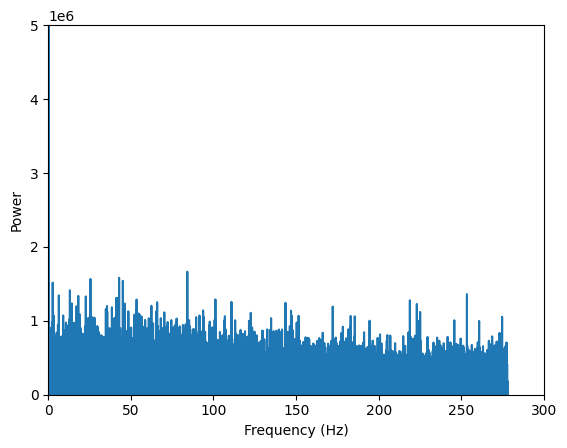

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# load time series data from a file into a numpy array
time = np.array(range(len(off_vals)))*180/len(off_vals)
signal = np.array(off_vals)

# compute the Fourier Transform of the signal
freqs = np.fft.fftfreq(signal.size, d=time[1]-time[0])
ft = np.fft.fft(signal)

# plot the power spectrum (magnitude of the Fourier Transform squared)
plt.plot(freqs, np.abs(ft)**2)
plt.ylim(-5,5e6)
plt.xlim(0, 300)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.show()

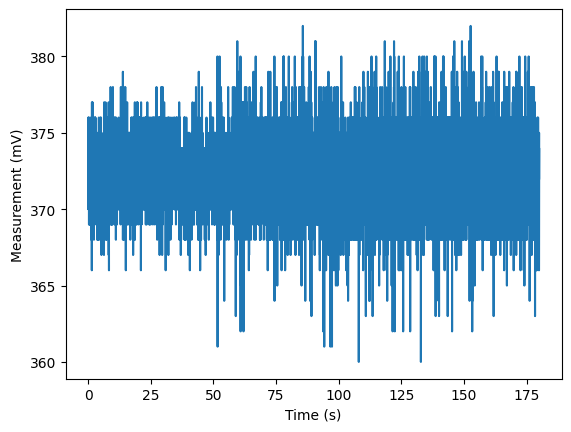

In [6]:
import matplotlib.pyplot as plt

plt.xlabel('Time (s)')
plt.ylabel('Measurement (mV)')
plt.plot(np.array(range(len(off_vals)))*180/len(off_vals), [int(val) for val in off_vals])
#plt.plot(range(len(off_vals)), [int(val) for val in on_vals])

In [7]:
means_dict = {}
for key, value in data_dict.items():
    means_dict[key] = value[0]/value[1]

In [8]:
contrast_dict = {}

for key, value in means_dict.items():
    if key[1] == 1:
        contrast_dict[key[0]] = value
    else:
        contrast_dict[key[0]] /= value

Minima at:  []


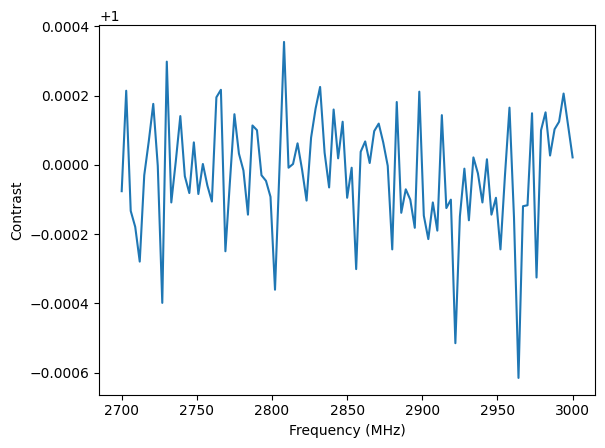

In [9]:
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

contrast_dict = {k: v for k, v in sorted(contrast_dict.items(), key=lambda item: item[0])}

plt.xlabel("Frequency (MHz)")
plt.ylabel("Contrast")
#plt.xlim([2850,2890])

plt.plot(list(contrast_dict.keys()), list(contrast_dict.values()))

minimaIndices = [ind for ind in argrelextrema(np.array(list(contrast_dict.values())), np.less)[0] if list(contrast_dict.values())[ind] < 0.998]
minimumFreq, minimumContrast = np.array(list(contrast_dict.keys()))[minimaIndices], np.array(list(contrast_dict.values()))[minimaIndices]
#plt.scatter(minimumFreq, minimumContrast)

print("Minima at: ", minimumFreq)